<a href="https://colab.research.google.com/github/ttlttk8161/ML_practice/blob/main/1015%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initailize Repository

In [3]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
class FeedforwardNeuralNetModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(FeedforwardNeuralNetModel, self).__init__()
    # Linear function
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    # Non-linear
    self.sigmoid = nn.Sigmoid()
    # Output Linear function
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    # Linear function # LINEAR
    out = self.fc1(x)
    # Non-linearity # NON- LINEAR
    out = self.sigmoid(out)
    # Linear function (readout) # LINEAR
    out = self.fc2(out)
    return out

In [5]:
# generate the input data
x_vals = np.random.rand(50)
x_train = np.asarray(x_vals, dtype=np.float32).reshape(-1,1)
y_correct = np.asarray([i**2 for i in x_vals], dtype=np.float32).reshape(-1,1)
# instantiate network
input_dim = 1
output_dim = 1
hidden_dim = 20
modelFF = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)
criterionFF = nn.MSELoss()
l_rate = 0.01

optimiser = torch.optim.Adam(modelFF.parameters(), lr = l_rate)

epochs = 5000

In [6]:
# Trainin
for epoch in range(epochs):
  epoch +=1
  # increase the number of epochs by 1 every time
  inputs = Variable(torch.from_numpy(x_train))
  labels = Variable(torch.from_numpy(y_correct))
  # clear grads
  optimiser.zero_grad()
  # forward to get predicted values
  outputs = modelFF.forward(inputs)
  loss = criterionFF(outputs, labels)
  loss.backward() #back props
  optimiser.step() # update  parameters

  if (epoch +1) % 500 == 0: # Logging
    print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, epochs, loss.item()))
    print('Final - epoch {}, loss {}'.format(epoch,loss.item()))


Epoch [500/5000], Loss: 0.0046
Final - epoch 499, loss 0.00457401480525732
Epoch [1000/5000], Loss: 0.0017
Final - epoch 999, loss 0.0016958704218268394
Epoch [1500/5000], Loss: 0.0001
Final - epoch 1499, loss 5.7654440752230585e-05
Epoch [2000/5000], Loss: 0.0000
Final - epoch 1999, loss 3.586948514566757e-05
Epoch [2500/5000], Loss: 0.0000
Final - epoch 2499, loss 3.2623851438984275e-05
Epoch [3000/5000], Loss: 0.0000
Final - epoch 2999, loss 2.8913624191773124e-05
Epoch [3500/5000], Loss: 0.0000
Final - epoch 3499, loss 2.4605215003248304e-05
Epoch [4000/5000], Loss: 0.0000
Final - epoch 3999, loss 1.9563558453228325e-05
Epoch [4500/5000], Loss: 0.0000
Final - epoch 4499, loss 1.4554809240507893e-05
Epoch [5000/5000], Loss: 0.0000
Final - epoch 4999, loss 1.0854726497200318e-05


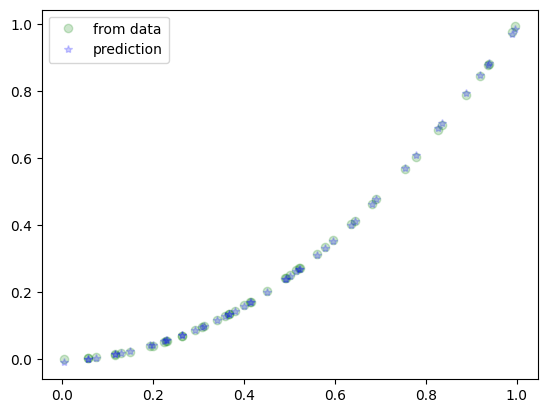

In [7]:
  # Test Training
  predicted = modelFF.forward(Variable(torch.from_numpy(x_train))).data.numpy()
  plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = 0.2)
  plt.plot(x_train, predicted, 'b*', label = 'prediction', alpha = 0.2)
  plt.legend()
  plt.show()